#setup

In [ ]:
# script for standard imports
%run '/content/drive/MyDrive/Data_Science/scripts/setup_get_gtd_data.ipynb'

#read in csv

In [ ]:
df = pd.read_csv('https://query.data.world/s/5gsd2uvm7f724ier2etajwqmiftygt')

In [ ]:
df.shape, df.columns

((104324, 22),
 Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
        '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
        'SF', 'GIDP'],
       dtype='object'))

In [ ]:
df.rename(columns={'playerID':'name','yearID':'yr'}, inplace=True)
df.rename(str.lower, axis='columns', inplace=True)
df.head()

,name,yr,stint,teamid,lgid,g,ab,r,h,2b,3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [ ]:
df.loc[(df['yr']>=2017), ['name','yr','ab', 'h']].head()

,name,yr,ab,h
102830,abadfe01,2017,0,0
102831,abreujo02,2017,621,189
102832,adamecr01,2017,13,0
102833,adamsau02,2017,0,0
102834,adamsla01,2017,109,30


median  48.0


count    104324.000000
mean        141.450481
std         184.567723
min           0.000000
25%           4.000000
50%          48.000000
75%         230.000000
max         716.000000
Name: ab, dtype: float64

(array([59458., 11411.,  6116.,  5187.,  4388.,  4353.,  4637.,  5271.,
         3193.,   310.]),
 array([  0. ,  71.6, 143.2, 214.8, 286.4, 358. , 429.6, 501.2, 572.8,
        644.4, 716. ]),
 <a list of 10 Patch objects>)

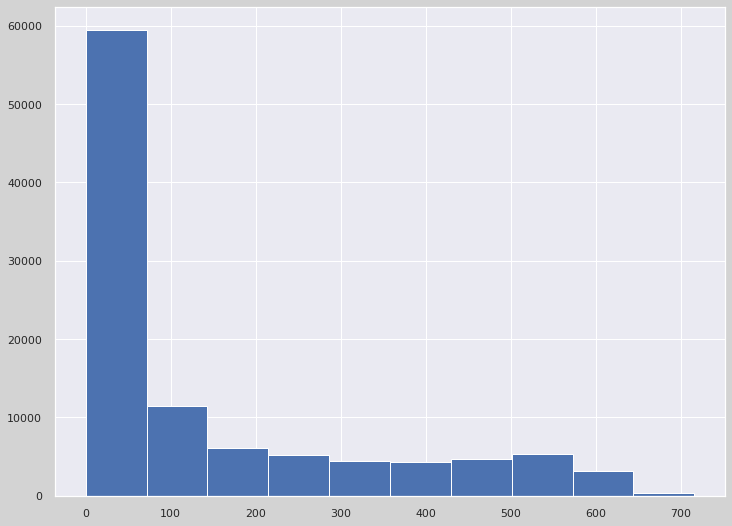

In [ ]:
print(f'median  {np.median(df.ab)}')
display(df.ab.describe())
plt.hist(df.ab)

In [ ]:
idx_zero_abs = df.loc[(df.ab<=0), 'ab'].index.values
df.drop(idx_zero_abs, axis=0, inplace=True)
df.shape

(88461, 22)

median  74.0


count    88461.000000
mean       166.815659
std        189.585345
min          1.000000
25%         15.000000
50%         74.000000
75%        287.000000
max        716.000000
Name: ab, dtype: float64

(array([43849., 11157.,  6208.,  5095.,  4446.,  4295.,  4637.,  5271.,
         3193.,   310.]),
 array([  1. ,  72.5, 144. , 215.5, 287. , 358.5, 430. , 501.5, 573. ,
        644.5, 716. ]),
 <a list of 10 Patch objects>)

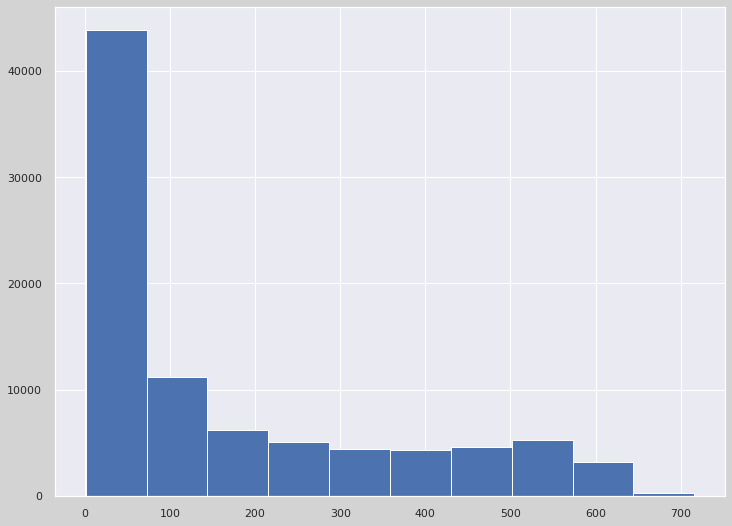

In [ ]:
#after emoving all obs/rows wher 'ab'==0
print(f'median  {np.median(df.ab)}')
display(df.ab.describe())
plt.hist(df.ab)

In [ ]:

display(df.ab.quantile(0.1))     # 10th percentile
display(np.percentile(df.ab, 1)) # equiv
# or
np.percentile(df.ab, [5,25,50,75,95])

3.0

1.0

array([  2.,  15.,  74., 287., 559.])

[how to scale data w/ outliers-mlmastery](https://machinelearningmastery.com/robust-scaler-transforms-for-machine-learning/)

In [ ]:
#robust scaling takes outliers into consideration (removes outlier b4 scaling)
# calculate summary statistics
ab_med, ab_std = np.median(df.ab), np.std(df.ab)
# identify outliers
thresh = ab_std * 3
low_cut = ab_med - thresh
hi_cut = ab_med + thresh

print(f'lower-threshold: {low_cut}\nupper-threshold: {hi_cut}')
# dfi for i in df.ab if i is <=low_cut or if i is >= hi_cut

lower-threshold: -494.7528199180772
upper-threshold: 642.7528199180772


In [ ]:
#robust scaling takes outliers into consideration (removes outlier b4 scaling)
# calculate summary statistics
ab_mean, ab_std = np.mean(df.ab), np.std(df.ab)
# identify outliers
thresh = ab_std * 3
low_cut = ab_mean - thresh
hi_cut = ab_mean + thresh

print(f'lower-threshold: {low_cut}\nupper-threshold: {hi_cut}')
# dfi for i in df.ab if i is <=low_cut or if i is >= hi_cut

lower-threshold: -401.93716104015357
upper-threshold: 735.5684787960008


In [ ]:
RobustScaler(,) df.ab

# work on same data other nb (3.19.18 historic baseball dataset)

In [ ]:
# Numpy and Pandas for Data preprocessing and formatting
import numpy as np
import pandas as pd

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Establish font size
plt.rcParams['font.size'] = 24

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Ignore warnings about setting value when making slice copies
pd.options.mode.chained_assignment = None

# Ipythonn for figsize
from IPython.core.pylabtools import figsize

# For splitting into Train and Test subsets
from sklearn.model_selection import train_test_split

# Imputing missing values and scaling values
from sklearn.preprocessing import Imputer, MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn import tree

# LIME for explaining predictions
import lime 
import lime.lime_tabular

# Additional imports taken from other examples that may be useful needed in future

from sklearn.model_selection import cross_val_score
# Pipeline standardizes input vecotrs and applies it to the ml model
from sklearn.pipeline import Pipeline, make_pipeline

In [ ]:
df = pd.read_csv('https://query.data.world/s/5gsd2uvm7f724ier2etajwqmiftygt')

In [ ]:
print(df.shape)
df.info()

(104324, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104324 entries, 0 to 104323
Data columns (total 22 columns):
playerID    104324 non-null object
yearID      104324 non-null int64
stint       104324 non-null int64
teamID      104324 non-null object
lgID        103586 non-null object
G           104324 non-null int64
AB          104324 non-null int64
R           104324 non-null int64
H           104324 non-null int64
2B          104324 non-null int64
3B          104324 non-null int64
HR          104324 non-null int64
RBI         103568 non-null float64
SB          101956 non-null float64
CS          80832 non-null float64
BB          104324 non-null int64
SO          97974 non-null float64
IBB         67722 non-null float64
HBP         101507 non-null float64
SH          98255 non-null float64
SF          68259 non-null float64
GIDP        78921 non-null float64
dtypes: float64(9), int64(10), object(3)
memory usage: 17.5+ MB


In [ ]:
df[(df.HR == 73)]

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
80766,bondsba01,2001,1,SFN,NL,153,476,129,156,32,2,73,137.0,13.0,3.0,177,93.0,35.0,9.0,0.0,2.0,5.0


In [ ]:
print(df[['yearID']].describe())
df[['playerID']].describe()

              yearID
count  104324.000000
mean     1965.007966
std        39.089856
min      1871.000000
25%      1935.000000
50%      1974.000000
75%      1999.000000
max      2017.000000


,playerID
count,104324
unique,19182
top,mcguide01
freq,31


In [ ]:
df.set_index()

In [ ]:
my_list = ['playerID','H','HR','RBI','BB','IBB','SO']
sort_cols = ['HR','BB']
df[my_list].sort_values(sort_cols, ascending=False)['BB'].head(10)

80766     177
77403     162
77750      73
78719     133
81784     116
79067      78
41674      94
22269     137
19052     145
104122     85
Name: BB, dtype: int64

In [ ]:
my_list = ['playerID','H','HR','RBI','BB','IBB','SO']

# All-Time HR Leaders (1871-2017) sorted by additional metrics: H, RBI, BB, IBB, SO (in that order):
tophr_alltime_sortby_H = df[my_list].sort_values('HR', ascending=False)['H'].sort_values(ascending=False)
tophr_alltime_sortby_RBI = df[my_list].sort_values('HR', ascending=False)['RBI'].sort_values(ascending=False)
tophr_alltime_sortby_BB = df[my_list].sort_values('HR', ascending=False)['BB'].sort_values(ascending=False)
tophr_alltime_sortby_IBB = df[my_list].sort_values('HR', ascending=False)['IBB'].sort_values(ascending=False)
tophr_alltime_sortby_SO = df[my_list].sort_values('HR', ascending=False)['SO'].sort_values(ascending=False)

84775    232
82095    198
80766    177
20109    170
33307    162
77403    162
34455    162
32724    156
38732    151
74269    151
Name: BB, dtype: int64


In [ ]:
# remove collinear features 
features = pd.DataFrame(features)

corr_matrix = features.corr()

upper = corr_atrix.where(np.trui(np.ones(corr_matrix.shape), k=1).astype(bool))

drop = [column for column in upper.columns if any(upper[column] > 0.90)]

features = features.drop(drop, axis=1)
features.dropna(how='all', axis=1)
features.shape

# Split
features = target.drop(columns= 'Target_col') 
targets = pd.DataFrame(target['Target_col'])

features = features.replace({np.inf: np.nan, -np.inf: np.nan})
x, x_test, y, y_test = train_test_split(features, target, train_size=0.3, random_state=7)

# Establish baseline MAE
def mae(y_true, y_pred):
    return np.mean(abs(y_true - Y_pred))

baseline = np.median(y)
baseline_mae = mae(y_test - baseline)

# Imputer: train on train, transform on train and test sets: total NaNs: make finite
imputer = Imputer(strategy= 'median')

imputer.fit(train_features)

X = imputer.transform(train_features)
X_test = imputer.transform(test_features)

np.sum(np.nan(X))
np.sum(np.nan(X_test))

np.where(np.isfinite(X))
np.where(np.isfinite(X_test))

# Scaler: train on train, transform on train and test sets
scaler = MinMaxScaler(feature_range=(0,1))

scaler.fit(X)

X = scaler.transform(X)
X_test = scaler.transform(X_test)

np.array(y).reshape((-1,))
np.array(y_test).reshape((-1,))

####
def mae(y_true, y_pred):
    return np.mean(abs(y_true - Y_pred))

def fit_predict_eval(model):
    model.fit(X,y)
mod_pred = model.predict(x_test)
mod_mae = mae(y_test, mod_pred)

return mod_mae

# LR MAE evaluation
lr = LinearRegression()
lr_mae = fit_predict_eval(lr)
print("Linear Regression MAE: %0.2f" %lr_mae)